In [16]:
# To draw Decision Tree
!pip install dtreeplt
!pip install mlxtend

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [18]:
df = pd.read_csv("iris-flower-dataset.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
species = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2,
}

In [20]:
df["class_value"] = df["class"].map(species)

In [21]:
df.sample(n=11)

,sepallength,sepalwidth,petallength,petalwidth,class,class_value
129,7.2,3.0,5.8,1.6,Iris-virginica,2
21,5.1,3.7,1.5,0.4,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
130,7.4,2.8,6.1,1.9,Iris-virginica,2
111,6.4,2.7,5.3,1.9,Iris-virginica,2
33,5.5,4.2,1.4,0.2,Iris-setosa,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
134,6.1,2.6,5.6,1.4,Iris-virginica,2
145,6.7,3.0,5.2,2.3,Iris-virginica,2
96,5.7,2.9,4.2,1.3,Iris-versicolor,1


Draw a scatter plot for **'sepallength'** and __'sepalwidth'__

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

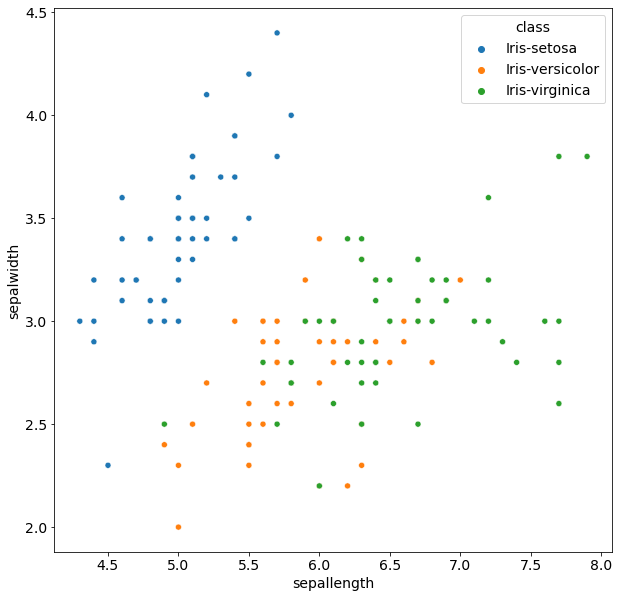

In [22]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")

Draw a scatter plot for  __*'petallength'*__ and ___'petalwidth'___

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

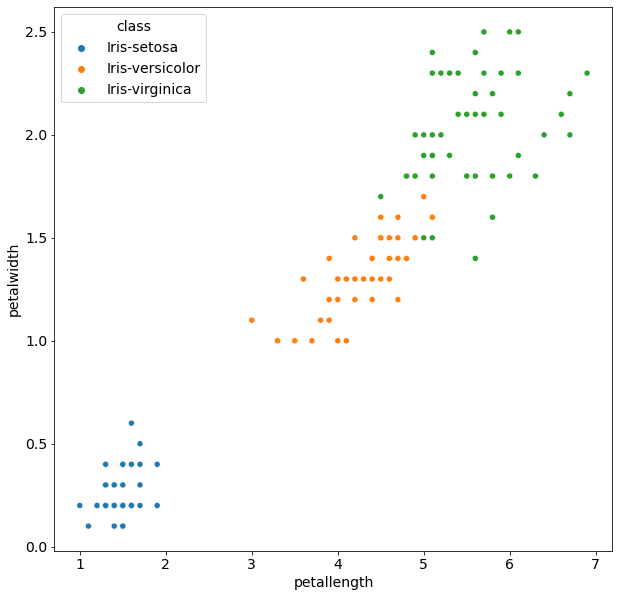

In [23]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")

### Check which feature has the greatest impact for classifed

<AxesSubplot:>

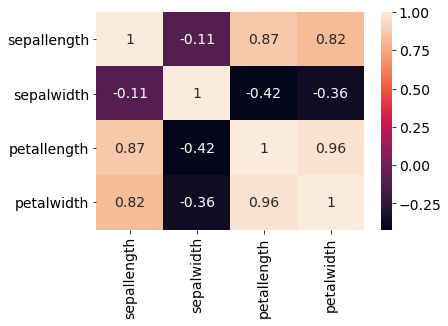

In [24]:
sns.heatmap( df.iloc[ : , :4].corr(), annot=True)

In [25]:
# Division of a data set into a dependent variable and an independent variable.

# independent variable
X = df[ ["petallength", "petalwidth"] ]

# dependent variable
y = df.class_value

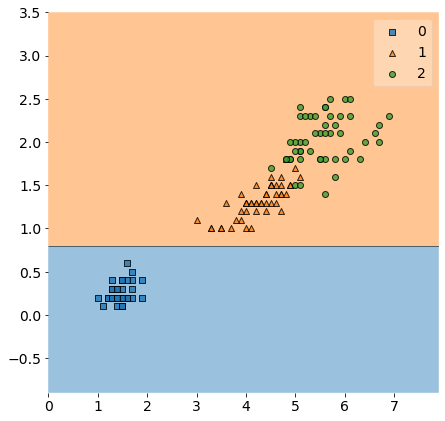

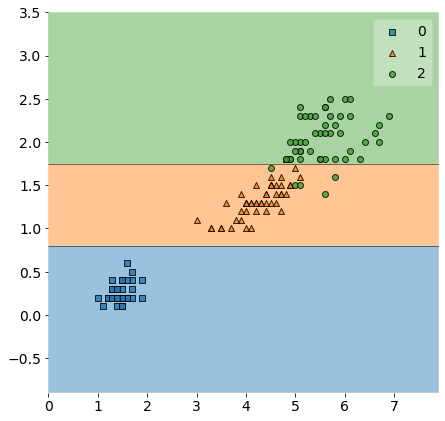

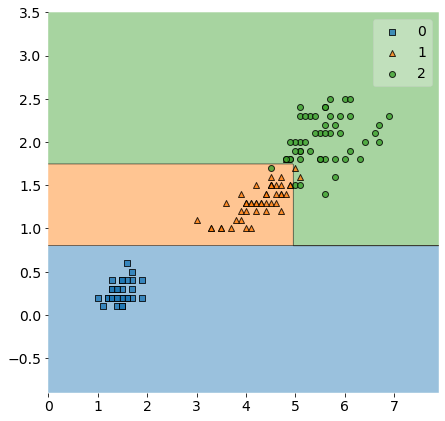

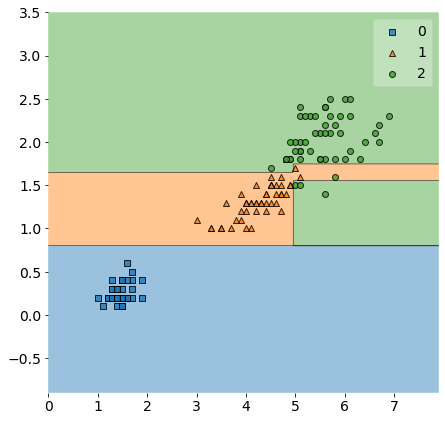

In [26]:
for x in range(1, 5):    
    model = DecisionTreeClassifier(max_depth=x, random_state=0)
    model.fit(X, y)
    plt.figure(figsize=(7, 7))
    plot_decision_regions(X.values, y.values, model)

C:\Users\Mati\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


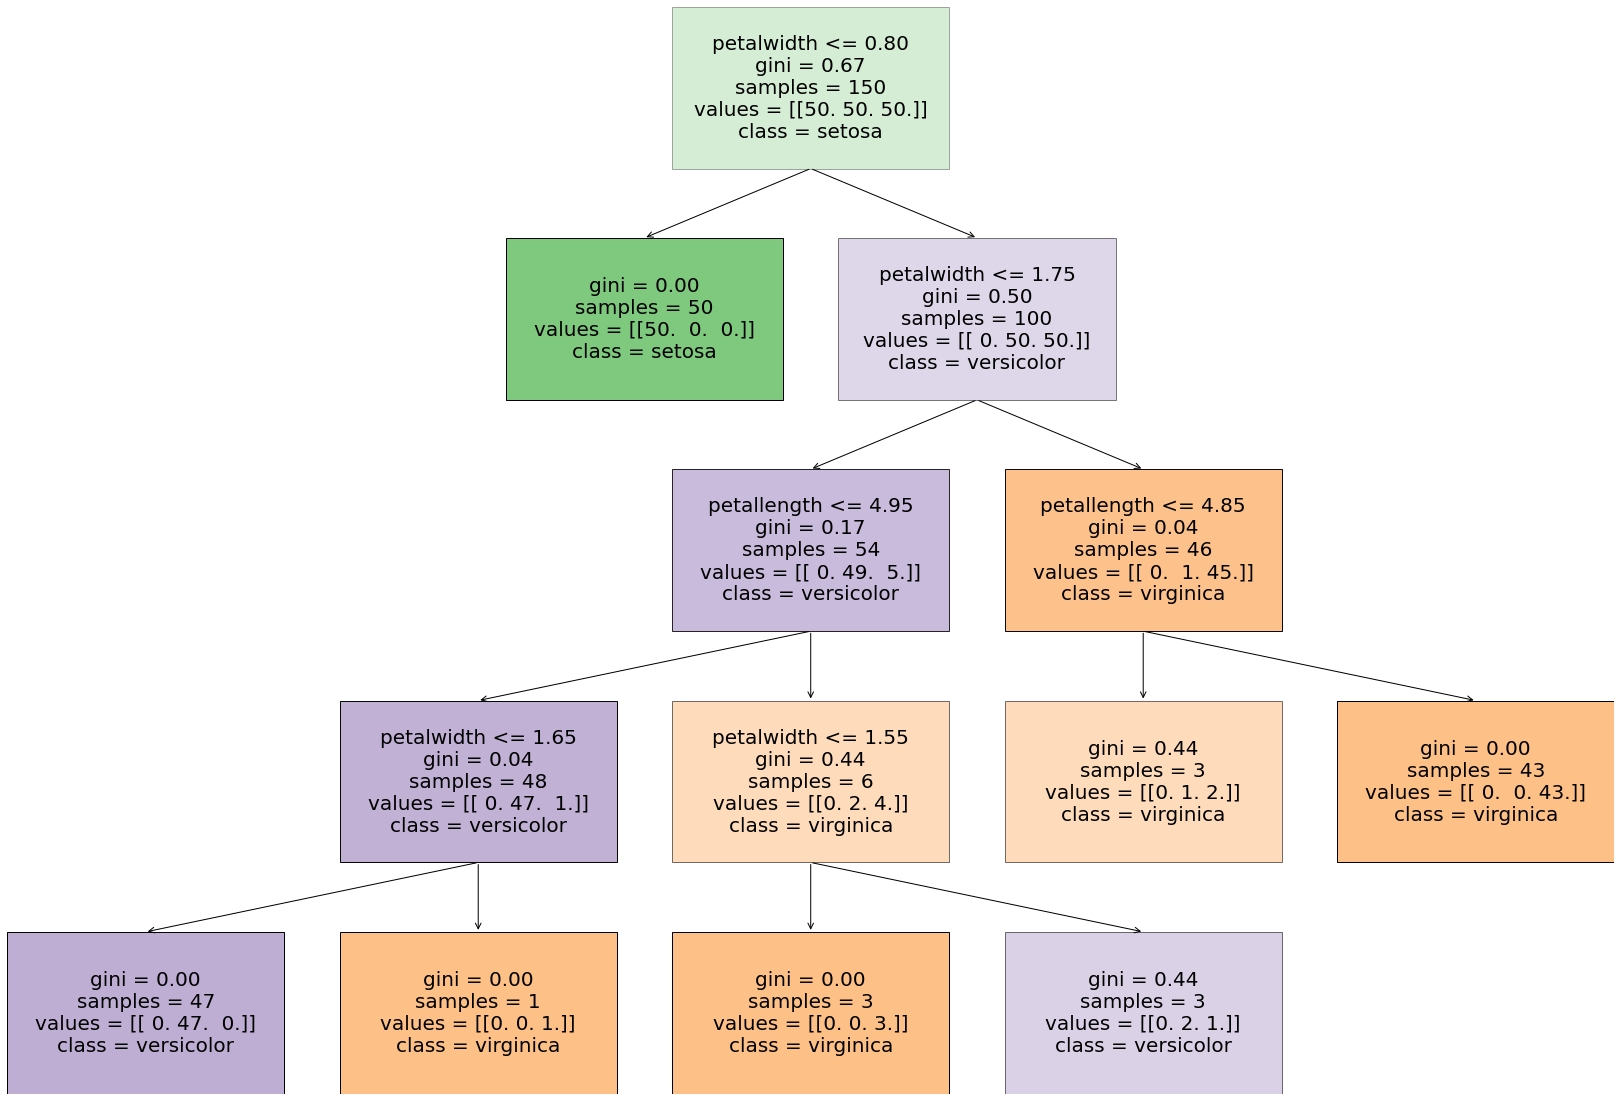

In [27]:
dtreeplt(model=model, feature_names=X.columns, target_names=["setosa", "versicolor", "virginica"]).view()
plt.show()

In [28]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=0)

C:\Users\Mati\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


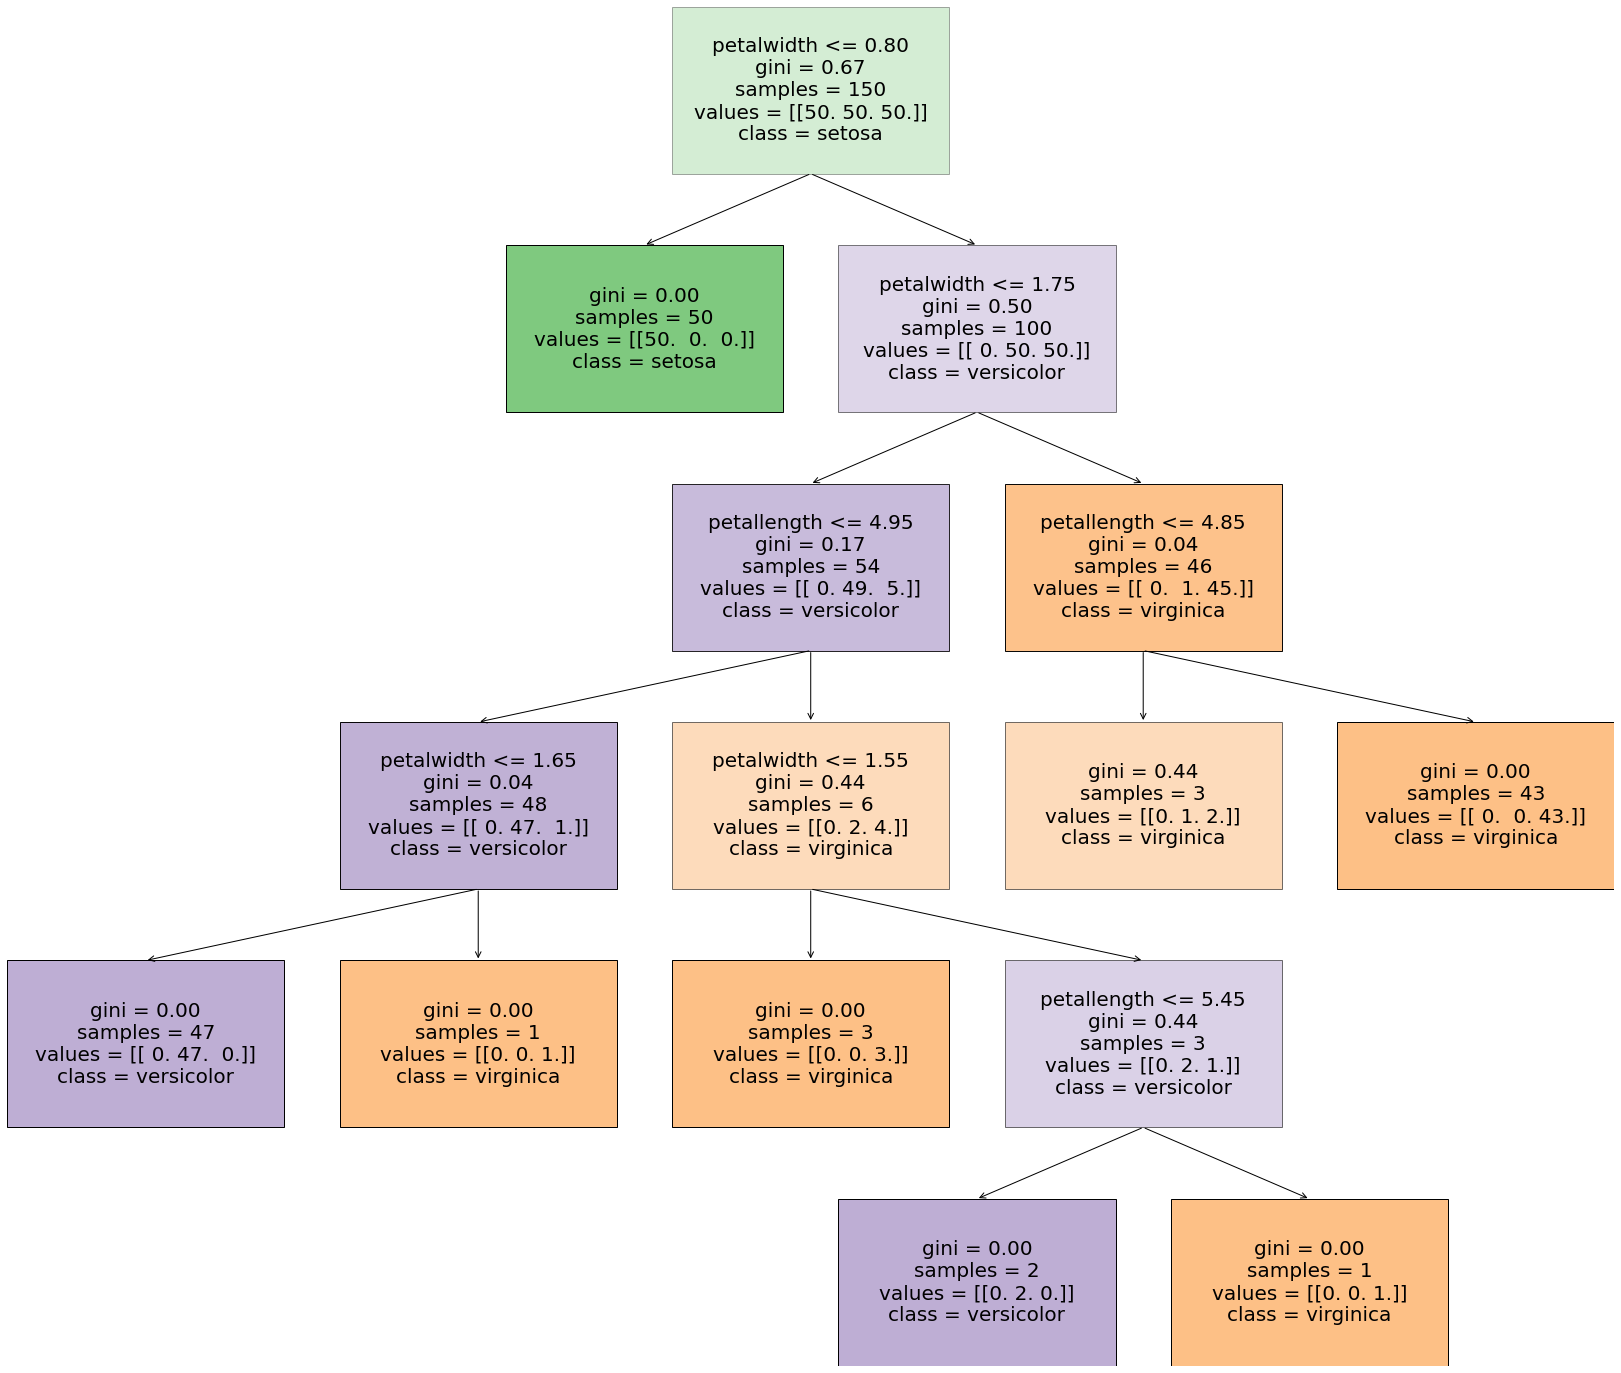

In [29]:
dtreeplt(model=model, feature_names=X.columns, target_names=["setosa", "versicolor", "virginica"]).view()
plt.show()

### The importance of features

The most important feature in classifying irises flowers is petalwidth

In [30]:
pd.DataFrame(model.feature_importances_, X.columns).sort_values(by=0, ascending=False)

,0
petalwidth,0.935078
petallength,0.064922
